In [375]:
# Installation and Imports
!pip install arff
!pip install seaborn

import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import benchmarks
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from _utilities_test import compute_accuracy, compute_fitness, initialize, sort_agents
from _transfer_functions import get_trans_function
from _utilities import Solution, Data, initialize, sort_agents, display, compute_fitness, Conv_plot

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [376]:
# Load the data in arff file as list
data = arff.load("Datasets/Colon.arff")

# Convert the list into dataframe
df = pd.DataFrame(data)


In [377]:
# Have a look at the first 3 rows of the dataframe
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,8589.416,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,...,67.56125,259.91250,138.89874,88.2325,39.66786,67.82875,75.67750,83.5225,28.70125,Tumor
1,9164.254,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,92.23875,96.27625,150.59000,82.2375,85.03333,152.19500,186.56750,44.4725,16.77375,Normal
2,3825.705,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,82.71500,31.10250,193.92000,76.9725,224.62024,31.22500,42.65625,16.0925,15.15625,Tumor


(62, 2001)
Number of Tumor:  40
Number of Normal :  22


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


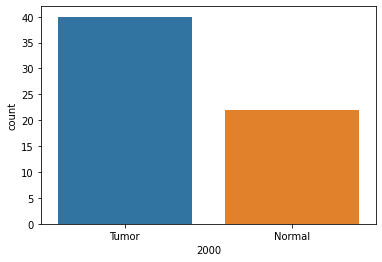

In [378]:
# Data preprocessing, extraction and splitting
print(df.shape)

X = df.drop(2000, axis=1)
Y = df[2000]

T, N = Y.value_counts()
print("Number of Tumor: ", T)
print("Number of Normal : ", N)

ax = sns.countplot(Y, label="Count")


In [379]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786703,4966.959971,4094.727906,3987.789302,2937.126132,4705.119294,3588.800302,2872.288627,4680.191126,4039.661958,...,186.204532,100.227903,293.222722,124.653387,133.186935,184.136636,84.118387,114.930000,53.251230,42.965827
std,3092.970593,2188.890465,1818.080945,2019.086906,1356.932895,2400.848121,1872.106074,1122.365445,2417.239210,2018.044259,...,117.605889,78.022713,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815500,...,5.950000,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250
25%,4877.364750,3408.951225,2763.725975,2648.942800,1890.857050,2843.368825,2112.952225,2050.814050,2971.792800,2797.992475,...,117.778870,48.409375,161.518125,69.121250,71.637500,85.905057,30.701875,53.881563,27.334375,24.610000
50%,6274.612550,4738.280500,3890.338150,3451.498150,2666.075700,4416.617650,3438.180000,2844.960650,4088.735500,3823.017800,...,152.722625,83.080625,251.883125,114.658125,104.271875,142.578565,56.385625,93.825625,45.358125,34.775000
75%,8712.283250,6455.843300,5008.993925,4738.408950,3563.969400,6076.031850,4420.645200,3414.228475,6171.382750,4840.715525,...,247.298513,117.208438,424.742500,177.730310,149.772188,212.019948,101.231250,145.074062,66.235312,54.697500
max,14876.407000,10152.273000,8605.044000,11248.680000,8093.875000,11222.682000,9939.246000,5917.026400,14144.835000,12307.913000,...,725.338100,438.383760,902.572500,333.418760,464.930000,702.130900,405.600000,390.890000,197.220000,126.826250


In [380]:
# Applying SVM classification without data processing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 14)

''' 
sigmoid => 0.68
rbf     => 0.88
poly    => 0.72
linear  => 0.72
'''

svc_classifier = SVC(kernel="rbf")
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
P = accuracy_score(y_pred, y_test)
print("Accuracy score for SVM:", P)


Accuracy score for SVM: 0.8421052631578947


In [381]:
# Grey Wolf Optimizer
############################### Parameters ####################################
#                                                                             #
#   num_agents: number of greywolves                                          #
#   max_iter: maximum number of generations                                   #
#   train_data: training samples of data                                      #
#   train_label: class labels for the training samples                        #
#   obj_function: the function to maximize while doing feature selection      #
#   trans_function_shape: shape of the transfer function used                 #
#   save_conv_graph: boolean value for saving convergence graph               #
#                                                                             #
###############################################################################


def GWO(
    num_agents,
    max_iter,
    train_data,
    train_label,
    obj_function=compute_fitness,
    trans_func_shape="s",
    save_conv_graph=False,
):
    short_name = "GWO"
    agent_name = "Greywolf"
    train_data, train_label = np.array(train_data), np.array(train_label)
    num_features = train_data.shape[1]
    trans_function = get_trans_function(trans_func_shape)

    # setting up the objectives
    weight_acc = None
    if obj_function == compute_fitness:
        weight_acc = float(input("Weight for the classification accuracy [0-1]: "))
    obj = (obj_function, weight_acc)
    compute_accuracy = (
        compute_fitness,
        1,
    )  # compute_accuracy is just compute_fitness with accuracy weight as 1

    # initialize greywolves and Leader (the agent with the max fitness)
    greywolves = initialize(num_agents, num_features)
    fitness = np.zeros(num_agents)
    accuracy = np.zeros(num_agents)
    Leader_agent = np.zeros((1, num_features))
    Leader_fitness = float("-inf")
    Leader_accuracy = float("-inf")

    # initialize convergence curves
    convergence_curve = {}
    convergence_curve["fitness"] = np.zeros(max_iter)

    # initialize data class
    data = Data()
    val_size = (
        float(input("Enter the percentage of data wanted for valdiation [0, 100]: "))
        / 100
    )
    data.train_X, data.val_X, data.train_Y, data.val_Y = train_test_split(
        train_data, train_label, stratify=train_label, test_size=val_size
    )

    # create a solution object
    solution = Solution()
    solution.num_agents = num_agents
    solution.max_iter = max_iter
    solution.num_features = num_features
    solution.obj_function = obj_function

    # rank initial greywolves
    greywolves, fitness = sort_agents(greywolves, obj, data)

    # start timer
    start_time = time.time()

    # initialize the alpha, beta and delta grey wolves and their fitness
    alpha, beta, delta = (
        np.zeros((1, num_features)),
        np.zeros((1, num_features)),
        np.zeros((1, num_features)),
    )
    alpha_fit, beta_fit, delta_fit = float("-inf"), float("-inf"), float("-inf")

    for iter_no in range(max_iter):
        print(
            "\n================================================================================"
        )
        print("                          Iteration - {}".format(iter_no + 1))
        print(
            "================================================================================\n"
        )

        # update the alpha, beta and delta grey wolves
        for i in range(num_agents):

            # update alpha, beta, delta
            if fitness[i] > alpha_fit:
                delta_fit = beta_fit
                delta = beta.copy()
                beta_fit = alpha_fit
                beta = alpha.copy()
                alpha_fit = fitness[i]
                alpha = greywolves[i, :].copy()

            # update beta, delta
            elif fitness[i] > beta_fit:
                delta_fit = beta_fit
                delta = beta.copy()
                beta_fit = fitness[i]
                beta = greywolves[i, :].copy()

            # update delta
            elif fitness[i] > delta_fit:
                delta_fit = fitness[i]
                delta = greywolves[i, :].copy()

        # a decreases linearly fron 2 to 0
        a = 2 - iter_no * ((2) / max_iter)

        for i in range(num_agents):
            for j in range(num_features):

                # calculate distance between alpha and current agent
                r1 = np.random.random()  # r1 is a random number in [0,1]
                r2 = np.random.random()  # r2 is a random number in [0,1]
                A1 = (2 * a * r1) - a  # calculate A1
                C1 = 2 * r2  # calculate C1
                D_alpha = abs(
                    C1 * alpha[j] - greywolves[i, j]
                )  # find distance from alpha
                X1 = alpha[j] - (A1 * D_alpha)  # Eq. (3.6)

                # calculate distance between beta and current agent
                r1 = np.random.random()  # r1 is a random number in [0,1]
                r2 = np.random.random()  # r2 is a random number in [0,1]
                A2 = (2 * a * r1) - a  # calculate A2
                C2 = 2 * r2  # calculate C2
                D_beta = abs(C2 * beta[j] - greywolves[i, j])  # find distance from beta
                X2 = beta[j] - (A2 * D_beta)  # Eq. (3.6)

                # calculate distance between delta and current agent
                r1 = np.random.random()  # r1 is a random number in [0,1]
                r2 = np.random.random()  # r2 is a random number in [0,1]
                A3 = (2 * a * r1) - a  # calculate A3
                C3 = 2 * r2  # calculate C3
                D_delta = abs(
                    C3 * delta[j] - greywolves[i, j]
                )  # find distance from delta
                X3 = delta[j] - A3 * D_delta  # Eq. (3.6)

                # update the position of current agent
                greywolves[i, j] = (X1 + X2 + X3) / 3  # Eq. (3.7)

            # Apply transformation function on the updated greywolf
            for j in range(num_features):
                trans_value = trans_function(greywolves[i, j])
                if np.random.random() < trans_value:
                    greywolves[i, j] = 1
                else:
                    greywolves[i, j] = 0

        # update final information
        greywolves, fitness = sort_agents(greywolves, obj, data)
        display(greywolves, fitness, agent_name)

        # update Leader (best agent)
        if fitness[0] > Leader_fitness:
            Leader_agent = greywolves[0].copy()
            Leader_fitness = fitness[0].copy()

        if alpha_fit > Leader_fitness:
            Leader_fitness = alpha_fit
            Leader_agent = alpha.copy()

        convergence_curve["fitness"][iter_no] = np.mean(fitness)

    # compute final accuracy
    Leader_agent, Leader_accuracy = sort_agents(Leader_agent, compute_accuracy, data)
    greywolves, accuracy = sort_agents(greywolves, compute_accuracy, data)

    print(
        "\n================================================================================"
    )
    print(
        "                                    Final Result                                  "
    )
    print(
        "================================================================================\n"
    )
    print("Leader " + agent_name + " Dimension : {}".format(int(np.sum(Leader_agent))))
    print("Leader " + agent_name + " Fitness : {}".format(Leader_fitness))
    print(
        "Leader " + agent_name + " Classification Accuracy : {}".format(Leader_accuracy)
    )
    print(
        "\n================================================================================\n"
    )

    # stop timer
    end_time = time.time()
    exec_time = end_time - start_time

    # plot convergence graph
    fig, axes = Conv_plot(convergence_curve)
    if save_conv_graph:
        plt.savefig("convergence_graph_" + short_name + ".jpg")
    plt.show()

    # update attributes of solution
    solution.best_agent = Leader_agent
    solution.best_fitness = Leader_fitness
    solution.best_accuracy = Leader_accuracy
    solution.convergence_curve = convergence_curve
    solution.final_greywolves = greywolves
    solution.final_fitness = fitness
    solution.final_accuracy = accuracy
    solution.execution_time = exec_time

    print(
        "\n================================================================================"
    )
    print(
        "                                    Final Result                                  "
    )
    print(
        "================================================================================\n"
    )
    print("Leader " + agent_name + " Dimension : {}".format(int(np.sum(Leader_agent))))
    print("Leader " + agent_name + " Fitness : {}".format(Leader_fitness))
    print(
        "Leader " + agent_name + " Classification Accuracy : {}".format(Leader_accuracy)
    )
    print(
        "\n================================================================================\n"
    )

    return solution



                          Iteration - 1


Number of agents: 10

------------- Best Agent ---------------
Fitness: 0.7342576923076924
Number of Features: 1161
----------------------------------------

Greywolf 1 - Fitness: 0.7342576923076924, Number of Features: 1161
Greywolf 2 - Fitness: 0.7315076923076924, Number of Features: 1216
Greywolf 3 - Fitness: 0.6675769230769231, Number of Features: 1110
Greywolf 4 - Fitness: 0.665726923076923, Number of Features: 1147
Greywolf 5 - Fitness: 0.664926923076923, Number of Features: 1163
Greywolf 6 - Fitness: 0.6643769230769231, Number of Features: 1174
Greywolf 7 - Fitness: 0.6643269230769231, Number of Features: 1175
Greywolf 8 - Fitness: 0.6635769230769231, Number of Features: 1190
Greywolf 9 - Fitness: 0.662726923076923, Number of Features: 1207
Greywolf 10 - Fitness: 0.6625269230769231, Number of Features: 1211


                          Iteration - 2


Number of agents: 10

------------- Best Agent ---------------
Fitness: 0.7319576923076

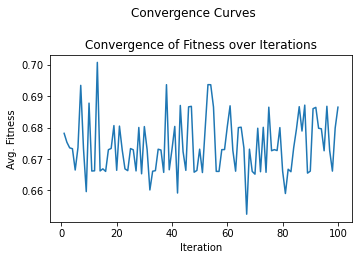


                                    Final Result                                  

Leader Greywolf Dimension : 1161
Leader Greywolf Fitness : 0.7342576923076924
Leader Greywolf Classification Accuracy : 0.7692307692307693




In [382]:
GWO(10, 100, X, Y, save_conv_graph=True)